In [827]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

SEED  = 42 
np.random.seed(SEED)

### Create data point

#### Sample test

In [828]:
def create_data_point(num_class = 5, num_points_per_class = 20):
    data = []
    for class_label in range(num_class):
        x = np.random.normal(loc=class_label * 3, scale=1.0, size=num_points_per_class)
        y = np.random.normal(loc=class_label * 3, scale=1.0, size=num_points_per_class)
        data.append(pd.DataFrame({'x': x, 'y': y, 'class': class_label}))
    
    df = pd.concat(data, ignore_index=True)
    return df
df = create_data_point(num_points_per_class=100)

In [829]:
df.head()

,x,y,class
0,0.496714,-1.415371,0
1,-0.138264,-0.420645,0
2,0.647689,-0.342715,0
3,1.523030,-0.802277,0
4,-0.234153,-0.161286,0


#### Function Building

In [830]:
def create_sample(num_classes = 2,
                  samples_per_class = 220,
                  seed = None)->pd.DataFrame:
    

    X, y = make_blobs(n_samples = num_classes * samples_per_class, 
                    centers = num_classes, 
                    cluster_std = 1.1, 
                    random_state = seed)
    df = pd.DataFrame(X, columns=['x', 'y'])
    df['class'] = y
    return df

### Data Point Visualization

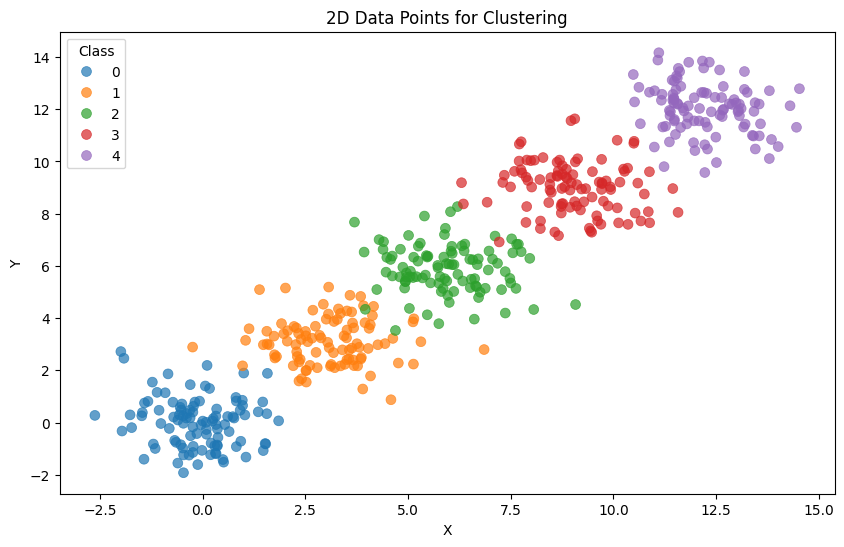

In [831]:
def visual(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=50, alpha=0.7, edgecolor=None)
    plt.title('2D Data Points for Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Class')
    plt.savefig('k-mean.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()

visual(df)

### Take data sample based on class 

In [832]:
class_0 = df[df['class']==0]
print(class_0.head())

          x         y  class
0  0.496714 -1.415371      0
1 -0.138264 -0.420645      0
2  0.647689 -0.342715      0
3  1.523030 -0.802277      0
4 -0.234153 -0.161286      0


In [833]:
class_1 = df[df['class']==1]
print(class_1.head())

            x         y  class
100  3.357787  2.171005      1
101  3.560785  2.439819      1
102  4.083051  3.747294      1
103  4.053802  3.610370      1
104  1.622331  2.979098      1


In [834]:
class_1 = df[df['class']==2]
print(class_1.head())

            x         y  class
200  4.405572  6.926178      2
201  5.400625  7.909417      2
202  6.005244  4.601432      2
203  6.046981  6.562969      2
204  5.549935  5.349357      2


### K-Mean Algorithm 

#### Build-up step-by-step

##### Convert DataFrame Point to numpy Point

In [835]:
x_point = df.to_numpy()[:,0]
y_point = df.to_numpy()[:,1]
print(x_point.shape)
print(y_point.shape)
print(x_point[0],y_point[0])

(500,)
(500,)
0.4967141530112327 -1.4153707420504142


In [836]:
list_point = np.column_stack((x_point, y_point))
array_points = np.array(list_point)
array_points_extended = np.array(list_point)[:, np.newaxis] 

print(array_points)
print(array_points.shape)
print(array_points_extended.shape)

[[ 4.96714153e-01 -1.41537074e+00]
 [-1.38264301e-01 -4.20645323e-01]
 [ 6.47688538e-01 -3.42714517e-01]
 [ 1.52302986e+00 -8.02277269e-01]
 [-2.34153375e-01 -1.61285712e-01]
 [-2.34136957e-01  4.04050857e-01]
 [ 1.57921282e+00  1.88618590e+00]
 [ 7.67434729e-01  1.74577813e-01]
 [-4.69474386e-01  2.57550391e-01]
 [ 5.42560044e-01 -7.44459158e-02]
 [-4.63417693e-01 -1.91877122e+00]
 [-4.65729754e-01 -2.65138754e-02]
 [ 2.41962272e-01  6.02302099e-02]
 [-1.91328024e+00  2.46324211e+00]
 [-1.72491783e+00 -1.92360965e-01]
 [-5.62287529e-01  3.01547342e-01]
 [-1.01283112e+00 -3.47117697e-02]
 [ 3.14247333e-01 -1.16867804e+00]
 [-9.08024076e-01  1.14282281e+00]
 [-1.41230370e+00  7.51933033e-01]
 [ 1.46564877e+00  7.91031947e-01]
 [-2.25776300e-01 -9.09387455e-01]
 [ 6.75282047e-02  1.40279431e+00]
 [-1.42474819e+00 -1.40185106e+00]
 [-5.44382725e-01  5.86857094e-01]
 [ 1.10922590e-01  2.19045563e+00]
 [-1.15099358e+00 -9.90536325e-01]
 [ 3.75698018e-01 -5.66297730e-01]
 [-6.00638690e-01  9

##### Randomly Create Centroid Point 

In [837]:
k_assumtion = 2
centroids = array_points[np.random.choice(array_points.shape[0], k_assumtion, replace=False)]
centroids

array([[10.84895609,  8.07676675],
       [ 9.71095997,  8.92983429]])

##### Distance Calculated and assign labels between centroid point to each sample in data

In [838]:
distances = np.linalg.norm(array_points[0:, np.newaxis]- centroids, axis=2)
print(distances)
labels = np.argmin(distances, axis=1)
''''''

[[14.04526922 13.85372127]
 [13.88974528 13.58082058]
 [13.22699983 12.9662273 ]
 [12.87673573 12.71834089]
 [13.80944691 13.474188  ]
 [13.47981902 13.09938685]
 [11.14681263 10.75817337]
 [12.80943649 12.51563661]
 [13.75670793 13.37347194]
 [13.14017    12.85054937]
 [15.09571396 14.87313693]
 [13.91708564 13.55659198]
 [13.2956074  12.97427431]
 [13.94225001 13.30187111]
 [15.04927835 14.62852512]
 [13.80834957 13.4159215 ]
 [14.37004105 13.97722366]
 [14.01635966 13.79413497]
 [13.6494015  13.16815742]
 [14.28256563 13.80597927]
 [11.87974697 11.58556258]
 [14.26186051 13.98388402]
 [12.67994856 12.2332378 ]
 [15.50767592 15.19038243]
 [13.63476865 13.22033745]
 [12.24557154 11.72944766]
 [15.04043807 14.71039727]
 [13.57909049 13.31629224]
 [13.95448282 13.57575771]
 [14.06181492 13.74919699]
 [14.96011659 14.70346641]
 [12.0445648  11.8440284 ]
 [14.19561556 13.94302297]
 [14.12717167 13.69205241]
 [13.47072283 13.26694447]
 [13.72150161 13.18966461]
 [13.84599305 13.58800596]
 

''

##### Update cluster's centroid point by calculate mean of X-coordinate and Y-coordinate

In [839]:
new_centroids = np.array([array_points[labels == i].mean(axis=0) for i in range(k_assumtion)])
new_centroids

array([[11.82375111,  9.50261019],
       [ 5.43060158,  5.64443832]])

In [840]:
distances = np.linalg.norm(array_points[0:, np.newaxis]- centroids, axis=2)
labels = np.argmin(distances, axis=1)
new_centroids = np.array([array_points[labels == i].mean(axis=0) for i in range(k_assumtion)])
print(new_centroids)
if np.all(new_centroids == centroids):
    print(f'Finish')
else:
    centroids = new_centroids
    print("continue")


[[11.82375111  9.50261019]
 [ 5.43060158  5.64443832]]
continue


In [841]:
print(centroids)

[[11.82375111  9.50261019]
 [ 5.43060158  5.64443832]]


#### Class Buidling

In [842]:
class KMean:
    def __init__(self, df: pd.DataFrame,
                 k = 5, 
                 max_iter = 1000) -> None :
        
        self.__df = df 
        self.__k = k
        self.__max_iter =max_iter

        self.__x_point = self.__df.to_numpy()[:,0]
        self.__y_point = self.__df.to_numpy()[:,1]

        self.__list_point  = np.column_stack((self.__x_point, self.__y_point))

        self.__array_points = np.array(self.__list_point)
        self.__array_points_extend = np.array(self.__list_point)[0:, np.newaxis] 

    def __visual(self,centroids_df, centroids):
        combined_df = pd.concat([self.__df,centroids_df ], ignore_index=True)

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=self.__df, x='x', y='y', hue='class', palette='tab10', s=50, alpha=0.7, markers="o", edgecolor=None)
        
        sns.scatterplot(data=combined_df[combined_df['class'] == 'centroid cluster'], x='x', y='y', color='black', s=300, 
                                marker='x', label='Centroid', edgecolor='black')

        plt.title('2D Data Points for Clustering')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend(title='Class')


        plt.savefig('kmean-cluster.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show()

    def cluster(self,visual  = False) -> list[pd.DataFrame, np.array,np.array] :
        """
            Return DataFrame of centroid point
            * Args:


            * Parameter:
            distances: distances matrix, with each row in matrix express disance from 1 point to centroid point
                [(sample_point -> centroid 1),  (sample_point -> centroid 2), (sample_point -> centroid 3))
            >>> distances
            array([[2.6878189  8.66977841 9.27567322]
                [2.59545772 8.84237138 9.23191662]
                [2.63731041 9.19806121 9.21298198]
                ...
                [7.26146886 1.08849996 3.54933464]
                [6.59683898 4.85696506 0.69884407]
                [6.52375225 3.53811902 0.67576247]])
            >>> labels: given cluster indicator
            array([0 0 0 ... 1 2 2])
        
        """
        '''
            self.__array_points.shape[0]: return number of point 

        '''
        number_row_of_centroid = self.__array_points.shape[0]
        
        centroids = self.__array_points[np.random.choice(number_row_of_centroid, self.__k, replace=False)]

        for _ in range(self.__max_iter):
            distances = np.linalg.norm(self.__array_points_extend  - centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([self.__array_points[labels == i].mean(axis=0) for i in range(self.__k)])
            if np.all(new_centroids == centroids):
                break
            

            centroids = new_centroids
        centroid_df = pd.DataFrame({
                'x': centroids[:,0],
                'y': centroids[:,1],
                'class':"centroid cluster"
            })
        if visual:
            self.__visual(centroid_df,centroids)
           


        return centroid_df

c:\Users\manmu\anaconda3\envs\aio\lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


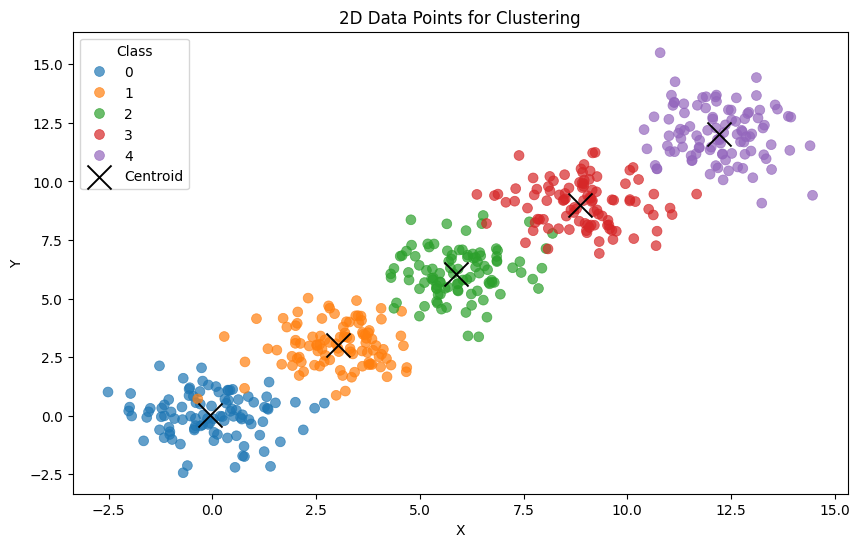

In [843]:
#df = create_sample(num_classes= 3, samples_per_class=100)
df =  create_data_point(num_points_per_class=100)
kmean = KMean(df, k = 5, max_iter = 1000)
centroids_df = kmean.cluster(visual = True)

In [844]:
centroids_df

,x,y,class
0,5.870654,6.029193,centroid cluster
1,-0.053890,0.038494,centroid cluster
2,3.026828,2.997701,centroid cluster
3,12.207166,12.005465,centroid cluster
4,8.861087,9.005864,centroid cluster


#### Visualize Controid DataFrame and Point DataFrame

c:\Users\manmu\anaconda3\envs\aio\lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


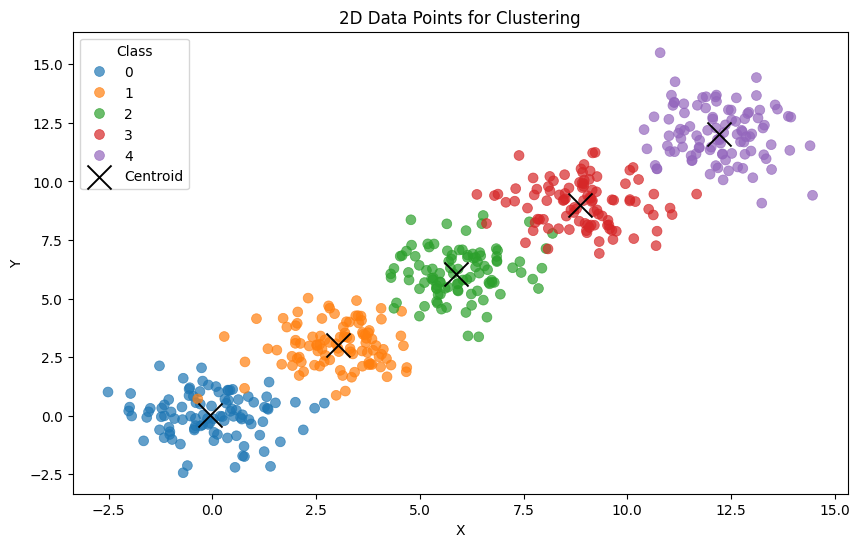

In [846]:
combined_df = pd.concat([df,centroids_df ], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=50, alpha=0.7, markers="o", edgecolor=None)
sns.scatterplot(data=combined_df[combined_df['class'] == 'centroid cluster'], x='x', y='y', color='black', s=300, 
                        marker='x', label='Centroid', edgecolor='black')
plt.title('2D Data Points for Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Class')
plt.savefig('centroid.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()